# Assignment 10
## Due July 03th
### names: Jennifer Them, Florence Lopez

In [72]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances
from numpy.linalg import inv, eig
from random import randint


np.random.seed(42)

In [73]:
import scipy.io
mat = scipy.io.loadmat('assignment10data.mat')
X = mat['X']
X.mean(0)

array([0.01316662, 0.07437076])

## Exercise 1

### a)

In [80]:
def KMeans(X, k):
    n = len(X)
    random_centers = []
    assigned_clusters = np.ones(n)
    old_clusters = []
    
    # chose random centers 
    for i in range(k):
        random_centers.append(X[randint(0, n-1)])
    
    while not np.array_equal(old_clusters, assigned_clusters):
    # assign clusters 
        for j in range(n):
            dists = euclidean_distances(random_centers, X[j].reshape(1, -1))
            cluster = np.argmin(dists)
            assigned_clusters[j] = cluster

        old_clusters = assigned_clusters 

        # compute new cluster centers
        for i in range(k):
            if np.where(assigned_clusters == i)[0].size != 0: 
                assigned = X[np.where(assigned_clusters == i)[0]] # points that were assigned to this cluster
                random_centers[i] = assigned.mean(0)

    return random_centers, assigned_clusters, old_clusters

In [81]:
# test KMeans
centers, clusters, old = KMeans(X, 5)
clusters

array([4., 4., 0., 4., 0., 4., 2., 4., 2., 4., 0., 4., 4., 4., 4., 4., 0.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4.,
       4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 0., 4., 4., 4., 0., 4.,
       4., 4., 4., 4., 4., 0., 4., 4., 0., 4., 4., 4., 0., 0., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4.,
       4., 4., 2., 0., 0., 4., 4., 4., 1., 1., 2., 1., 1., 1., 2., 2., 1.,
       1., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2.,
       1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 0.,
       3., 2., 1., 1., 1.

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 4, 0, 3, 3, 0, 3, 3, 0, 0, 4, 2, 0, 2, 4, 1, 3, 2, 0, 2, 0, 2,
       2, 1, 3, 3, 0, 2, 3, 1, 0, 1, 0, 0, 4, 1, 3, 3, 0, 3, 1, 2, 1, 2,
       0, 2, 0, 4, 3, 1, 4, 2, 1, 3, 1, 1, 4, 2, 1, 0, 4, 1, 4, 1, 1, 1,
       0, 2, 1, 0, 0, 2, 4, 4, 1, 0, 2, 2, 4, 1, 2,

### b)

In [83]:
# k = 3 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<IPython.core.display.Javascript object>


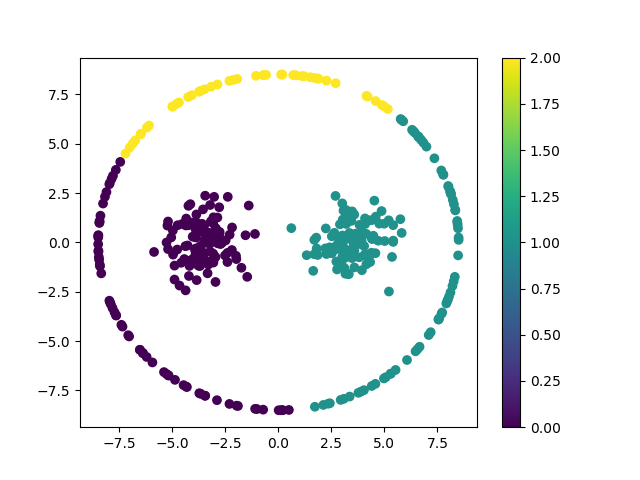

In [84]:
# plot for k = 3 
plt.scatter(X[:,0], X[:,1], c = y_kmeans)
plt.colorbar()

In [85]:
# k = 2 
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<IPython.core.display.Javascript object>


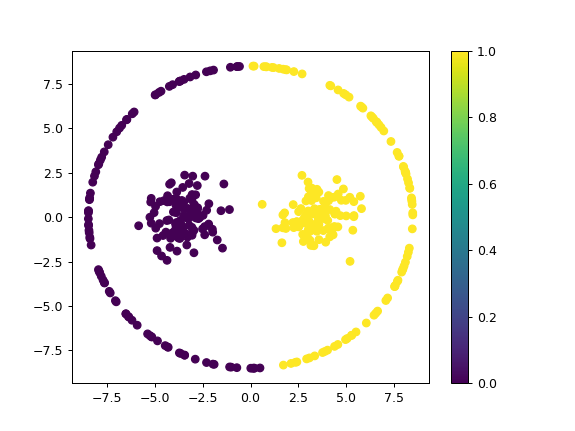

In [86]:
# plot for k = 2
plt.scatter(X[:,0], X[:,1], c = y_kmeans)
plt.colorbar()

In [87]:
# k = 4 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<IPython.core.display.Javascript object>


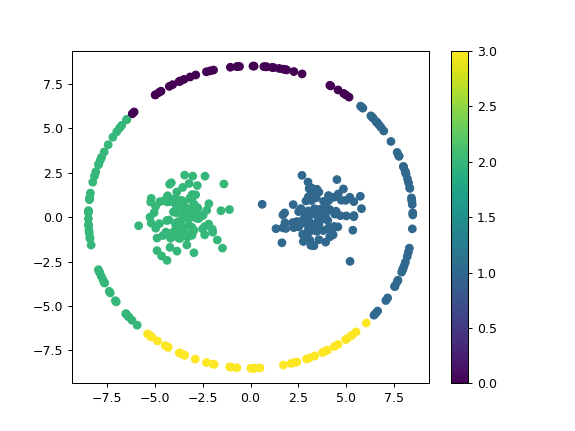

In [88]:
# plot for k = 4
plt.scatter(X[:,0], X[:,1], c = y_kmeans)
plt.colorbar()

### c)

In [124]:
def generateKNNgraph(X, k):
    n = len(X)
    W = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dists_j = euclidean_distances(X, X[j].reshape(1, -1))
            dists_i = euclidean_distances(X, X[i].reshape(1, -1))
            sorted_dists_j = np.argsort(np.squeeze(dists_j))
            sorted_dists_i = np.argsort(np.squeeze(dists_i))
            k_nearest_j = sorted_dists_j[:k]
            k_nearest_i = sorted_dists_i[:k]
            if X[i] in X[k_nearest_j] or X[j] in X[k_nearest_i]:
                W[i, j] = 1
            else: 
                W[i, j] = 0
    return W

In [125]:
# test generateKNNgraph
W = generateKNNgraph(X, 3)

In [126]:
W

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [9]:
def spectralClustering(W, k, normalised):
    centers = []
    clustering = []
    embeddings = []
    
    if not normalised: 
        
        
    
    pass